In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
INPUT_DIR = "input/"

In [3]:
# ref: https://www.data.jma.go.jp/gmd/risk/obsdl/index.php

df = pd.read_csv(INPUT_DIR + 'temp.csv', header=3, encoding="shift-jis")
df = df.rename(columns={"Unnamed: 0":"date", "Unnamed: 1":"temperature"})
df.head()

,date,temperature,品質情報,均質番号
0,2016/4/1,12.8,8,1
1,2016/4/2,10.5,8,1
2,2016/4/3,13.1,8,1
3,2016/4/4,15.6,8,1
4,2016/4/5,10.8,8,1


In [4]:
#欠損無し
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1796 non-null   object 
 1   temperature  1796 non-null   float64
 2   品質情報         1796 non-null   int64  
 3   均質番号         1796 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 56.2+ KB


In [5]:
df.describe()

,temperature,品質情報,均質番号
count,1796.000000,1796.000000,1796.0
mean,16.565535,7.994989,1.0
std,7.868848,0.122542,0.0
min,0.000000,5.000000,1.0
25%,9.300000,8.000000,1.0
50%,16.850000,8.000000,1.0
75%,23.025000,8.000000,1.0
max,32.200000,8.000000,1.0


In [6]:
df = df.drop(df.columns[[2,3]], axis=1) # 品質情報や均質番号は一旦無視
df['date'] = pd.to_datetime(df['date'])

Text(0, 0.5, 'degC')

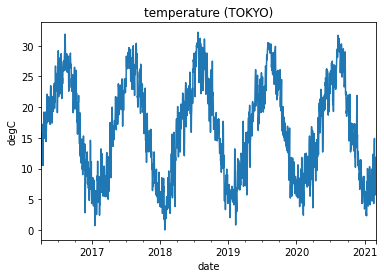

In [7]:
plt.title('temperature (TOKYO)')
df.set_index('date')['temperature'].plot()
plt.ylabel('degC')

In [8]:
df_week_temp = df.copy().reset_index(drop=False)
df_week_temp['year'] = df_week_temp['date'].dt.isocalendar().year
df_week_temp['week'] = df_week_temp['date'].dt.isocalendar().week #週番号（1~53）の取得

grp = df_week_temp.groupby(['year', 'week'])

se_week = grp.mean()['temperature']
df_week = pd.DataFrame(se_week)
df_week['temperature_std'] = grp.std()['temperature']
df_week['date'] = grp.min()['date'] # 週の最初の日をインデックスにする。
df_week = df_week.set_index('date')
df_week = df_week.drop(df_week.index[[0, -1]]) #半端な週を除く
df_week.head()

,temperature,temperature_std
date,,
2016-04-04,15.028571,2.238090
2016-04-11,14.685714,2.928269
2016-04-18,16.771429,1.362246
2016-04-25,17.114286,1.722816
2016-05-02,20.371429,1.893598


In [9]:
df_month_temp = df.copy().reset_index(drop=False)
df_month_temp['year'] = df_month_temp['date'].dt.year
df_month_temp['month'] = df_month_temp['date'].dt.month #月の取得

grp = df_month_temp.groupby(['year', 'month'])

se_month = grp.mean()['temperature']
df_month = pd.DataFrame(se_month)
df_month['temperature_std'] = grp.std()['temperature']
df_month['date'] = grp.min()['date'] # 最初の日をインデックスにする。
df_month = df_month.set_index('date')
df_month.head()

,temperature,temperature_std
date,,
2016-04-01,15.446667,2.469641
2016-05-01,20.161290,1.905374
2016-06-01,22.353333,2.003399
2016-07-01,25.374194,2.224555
2016-08-01,27.116129,1.703153


In [10]:
df_year_temp = df_month.copy().reset_index(drop=False)
df_year_temp['year'] = df_year_temp['date'].dt.year

grp = df_year_temp.groupby(['year'])

se_year = grp.mean()['temperature']
df_year = pd.DataFrame(se_year)
df_year['temperature_std'] = grp.std()['temperature']
df_year['date'] = grp.min()['date'] # 最初の日をインデックスにする。
df_year = df_year.set_index('date')
df_year = df_year.drop(df_year.index[[0, -1]]) #半端な年を除く
df_year.head()

,temperature,temperature_std
date,,
2017-01-01,15.825266,7.886118
2018-01-01,16.770907,8.129271
2019-01-01,16.440164,7.661283
2020-01-01,16.529431,7.504154


In [11]:
df.to_csv(INPUT_DIR + 'daily_temperature.csv', index=True)
df_week.to_csv(INPUT_DIR + 'weekly_temperature.csv', index=True)
df_month.to_csv(INPUT_DIR + 'monthly_temperature.csv', index=True)
df_year.to_csv(INPUT_DIR + 'yearly_temperature.csv', index=True)